# Data handling - R

## variables

In [23]:
cst<-3 ## num of log pop cluster determine log time clusters

## data input and pre-processing

In [24]:
## data cleaning
a<-read.csv("../data/LogisticGrowthData.csv", header = T, stringsAsFactors = F)[,-1]
  a<-a[,c(3,6:9,1,2,5)]
  colnames(a)=c("Temp.C","clade","substrate","replicate","SourceRef","Time.hr","Popn_Change","Popn_DataUnit")
  a$Time.hr<-abs(a$Time.hr) ## convert -ve times
  a$clade<-gsub(".1|.2|..RDA.R.","",a$clade) ## condense spp names
  a$clade<-gsub("spp.|sp.","sp",a$clade) ## condense spp names
  a$clade<-gsub("[.]"," ",a$clade) ## condense spp names
  a$clade<-gsub("77|88|Strain 97|StrainCYA28|subsp Carotovorum Pc","",a$clade) ## rm specific unnecessary things for better spp categorizing
  a$clade<-trimws(a$clade) ## condense spp names (rm white spaces from both ends)
  # levels(as.factor(a$clade))
a

Temp.C,clade,substrate,replicate,SourceRef,Time.hr,Popn_Change,Popn_DataUnit
<int>,<chr>,<chr>,<int>,<chr>,<dbl>,<dbl>,<chr>
5,Chryseobacterium balustinum,TSB,1,"Bae, Y.M., Zheng, L., Hyun, J.E., Jung, K.S., Heu, S. and Lee, S.Y., 2014. Growth characteristics and biofilm formation of various spoilage bacteria isolated from fresh produce. Journal of food science, 79(10), pp.M2072-M2080.",6.698795e+02,0.283275712,OD_595
5,Chryseobacterium balustinum,TSB,1,"Bae, Y.M., Zheng, L., Hyun, J.E., Jung, K.S., Heu, S. and Lee, S.Y., 2014. Growth characteristics and biofilm formation of various spoilage bacteria isolated from fresh produce. Journal of food science, 79(10), pp.M2072-M2080.",6.469880e+02,0.283342064,OD_595
5,Chryseobacterium balustinum,TSB,1,"Bae, Y.M., Zheng, L., Hyun, J.E., Jung, K.S., Heu, S. and Lee, S.Y., 2014. Growth characteristics and biofilm formation of various spoilage bacteria isolated from fresh produce. Journal of food science, 79(10), pp.M2072-M2080.",6.228916e+02,0.285151039,OD_595
5,Chryseobacterium balustinum,TSB,1,"Bae, Y.M., Zheng, L., Hyun, J.E., Jung, K.S., Heu, S. and Lee, S.Y., 2014. Growth characteristics and biofilm formation of various spoilage bacteria isolated from fresh produce. Journal of food science, 79(10), pp.M2072-M2080.",5.975904e+02,0.281746115,OD_595
5,Chryseobacterium balustinum,TSB,1,"Bae, Y.M., Zheng, L., Hyun, J.E., Jung, K.S., Heu, S. and Lee, S.Y., 2014. Growth characteristics and biofilm formation of various spoilage bacteria isolated from fresh produce. Journal of food science, 79(10), pp.M2072-M2080.",5.746988e+02,0.273116815,OD_595
5,Chryseobacterium balustinum,TSB,1,"Bae, Y.M., Zheng, L., Hyun, J.E., Jung, K.S., Heu, S. and Lee, S.Y., 2014. Growth characteristics and biofilm formation of various spoilage bacteria isolated from fresh produce. Journal of food science, 79(10), pp.M2072-M2080.",5.506024e+02,0.257534486,OD_595
5,Chryseobacterium balustinum,TSB,1,"Bae, Y.M., Zheng, L., Hyun, J.E., Jung, K.S., Heu, S. and Lee, S.Y., 2014. Growth characteristics and biofilm formation of various spoilage bacteria isolated from fresh produce. Journal of food science, 79(10), pp.M2072-M2080.",5.265060e+02,0.257604330,OD_595
5,Chryseobacterium balustinum,TSB,1,"Bae, Y.M., Zheng, L., Hyun, J.E., Jung, K.S., Heu, S. and Lee, S.Y., 2014. Growth characteristics and biofilm formation of various spoilage bacteria isolated from fresh produce. Journal of food science, 79(10), pp.M2072-M2080.",5.024096e+02,0.245500262,OD_595
5,Chryseobacterium balustinum,TSB,1,"Bae, Y.M., Zheng, L., Hyun, J.E., Jung, K.S., Heu, S. and Lee, S.Y., 2014. Growth characteristics and biofilm formation of various spoilage bacteria isolated from fresh produce. Journal of food science, 79(10), pp.M2072-M2080.",4.795181e+02,0.247305745,OD_595


In [25]:
## data subset selection -- select the largest data subset
  a.DU.lv<-levels(as.factor(a$Popn_DataUnit))
  a.Tp.lv<-levels(as.factor(a$Temp.C))
  a.cd.lv<-levels(as.factor(a$clade))
  a.ss.lv<-levels(as.factor(a$substrate))
  a.rp.lv<-levels(as.factor(a$replicate))
  a.ct.lv<-levels(as.factor(a$SourceRef))

In [26]:
## hierarchical selection of available subsets
  p.rec<-as.data.frame(matrix(nrow = 0, ncol = 6))
  cat("R Filtering 1st set of columns\n")
  p.2<-p.4<-p.6<-1;repeat{
    ## check repeat loop running num seq
    if(p.2==length(a.Tp.lv)){
      if(p.4==length(a.ss.lv)){
        if(p.6==length(a.ct.lv)){
          break
        }else{
          p.2<-p.4<-1
          p.6<-p.6+1
        }
      }else{
        p.2<-1
        p.4<-p.4+1
      }
    }else{
      p.2<-p.2+1
    }
    ## scan subset dimension
    p.7<-dim(a[which(a$Temp.C==a.Tp.lv[p.2] &
                       a$substrate==a.ss.lv[p.4] &
                       a$SourceRef==a.ct.lv[p.6]),])[1]
    if(p.7 > 0){p.rec[(dim(p.rec)[1]+1),]<-c(NA,p.2,NA,p.4,NA,p.6)}
  }
  p.recL<-dim(p.rec)[1]

R Filtering 1st set of columns


In [27]:
cat("R Filtering 2nd set of columns\n")
  p.1<-p.3<-p.5<-1;repeat{
    ## check repeat loop running num seq
    if(p.1==length(a.DU.lv)){
      if(p.3==length(a.cd.lv)){
        if(p.5==length(a.rp.lv)){
          break
        }else{
          p.1<-p.3<-1
          p.5<-p.5+1
        }
      }else{
        p.1<-1
        p.3<-p.3+1
      }
    }else{
      p.1<-p.1+1
    }
    ## scan subset dimension
    p.7<-dim(a[which(a$Popn_DataUnit==a.DU.lv[p.1] &
                       a$clade==a.cd.lv[p.3] &
                       a$replicate==a.rp.lv[p.5]),])[1]
    if(p.7 > 0){p.rec[(dim(p.rec)[1]+1),]<-c(p.1,NA,p.3,NA,p.5,NA)}
  }
  a.0<-as.data.frame(matrix(nrow = 0,ncol = dim(a)[2]))

R Filtering 2nd set of columns


Parameter count

| model | count |
|---|---|
| log0 | 1 |
| gom | 2 |
| bar | 2 |
|buc | 2 |

In [28]:
cat("R Combine filtering result\n")
a.0<-as.data.frame(matrix(nrow=0, ncol = dim(a)[1]))
  for(i in 1:p.recL){ ## further select for subset with largest data points
    for(j in (p.recL):dim(p.rec)[1]){
      p.7<-a[which(a$Popn_DataUnit==a.DU.lv[p.rec[j,1]] &
                     a$Temp.C==a.Tp.lv[p.rec[i,2]] &
                     a$clade==a.cd.lv[p.rec[j,3]] &
                     a$substrate==a.ss.lv[p.rec[i,4]] &
                     a$replicate==a.rp.lv[p.rec[j,5]] &
                     a$SourceRef==a.ct.lv[p.rec[i,6]]),]
#      if(dim(p.7)[1] > dim(a.0)[1]){a.0<-p.7}
      if(dim(p.7)[1] > 3){a.0<-rbind(a.0,p.7)} ## max parameters + 1
    }
  };rm(i,j)
  rm(list=ls(pattern="p.|.lv"))
a.0

R Combine filtering result


,Temp.C,clade,substrate,replicate,SourceRef,Time.hr,Popn_Change,Popn_DataUnit
,<int>,<chr>,<chr>,<int>,<chr>,<dbl>,<dbl>,<chr>
235,5,Acinetobacter clacoaceticus,TSB,1,"Bae, Y.M., Zheng, L., Hyun, J.E., Jung, K.S., Heu, S. and Lee, S.Y., 2014. Growth characteristics and biofilm formation of various spoilage bacteria isolated from fresh produce. Journal of food science, 79(10), pp.M2072-M2080.",6.718053e+02,0.11788856,OD_595
236,5,Acinetobacter clacoaceticus,TSB,1,"Bae, Y.M., Zheng, L., Hyun, J.E., Jung, K.S., Heu, S. and Lee, S.Y., 2014. Growth characteristics and biofilm formation of various spoilage bacteria isolated from fresh produce. Journal of food science, 79(10), pp.M2072-M2080.",6.474645e+02,0.11964809,OD_595
237,5,Acinetobacter clacoaceticus,TSB,1,"Bae, Y.M., Zheng, L., Hyun, J.E., Jung, K.S., Heu, S. and Lee, S.Y., 2014. Growth characteristics and biofilm formation of various spoilage bacteria isolated from fresh produce. Journal of food science, 79(10), pp.M2072-M2080.",6.243408e+02,0.11260997,OD_595
238,5,Acinetobacter clacoaceticus,TSB,1,"Bae, Y.M., Zheng, L., Hyun, J.E., Jung, K.S., Heu, S. and Lee, S.Y., 2014. Growth characteristics and biofilm formation of various spoilage bacteria isolated from fresh produce. Journal of food science, 79(10), pp.M2072-M2080.",5.987830e+02,0.11612903,OD_595
239,5,Acinetobacter clacoaceticus,TSB,1,"Bae, Y.M., Zheng, L., Hyun, J.E., Jung, K.S., Heu, S. and Lee, S.Y., 2014. Growth characteristics and biofilm formation of various spoilage bacteria isolated from fresh produce. Journal of food science, 79(10), pp.M2072-M2080.",5.756592e+02,0.11788856,OD_595
240,5,Acinetobacter clacoaceticus,TSB,1,"Bae, Y.M., Zheng, L., Hyun, J.E., Jung, K.S., Heu, S. and Lee, S.Y., 2014. Growth characteristics and biofilm formation of various spoilage bacteria isolated from fresh produce. Journal of food science, 79(10), pp.M2072-M2080.",5.513185e+02,0.11436950,OD_595
241,5,Acinetobacter clacoaceticus,TSB,1,"Bae, Y.M., Zheng, L., Hyun, J.E., Jung, K.S., Heu, S. and Lee, S.Y., 2014. Growth characteristics and biofilm formation of various spoilage bacteria isolated from fresh produce. Journal of food science, 79(10), pp.M2072-M2080.",5.269777e+02,0.12140762,OD_595
242,5,Acinetobacter clacoaceticus,TSB,1,"Bae, Y.M., Zheng, L., Hyun, J.E., Jung, K.S., Heu, S. and Lee, S.Y., 2014. Growth characteristics and biofilm formation of various spoilage bacteria isolated from fresh produce. Journal of food science, 79(10), pp.M2072-M2080.",5.038540e+02,0.11964809,OD_595
243,5,Acinetobacter clacoaceticus,TSB,1,"Bae, Y.M., Zheng, L., Hyun, J.E., Jung, K.S., Heu, S. and Lee, S.Y., 2014. Growth characteristics and biofilm formation of various spoilage bacteria isolated from fresh produce. Journal of food science, 79(10), pp.M2072-M2080.",4.795132e+02,0.12316716,OD_595


## time-population clustering definitions

In [29]:
write.table(a.0,"../data/Log_data.txt",quote = F, row.names = F, sep="\t")

## trial cluster plots

In [30]:
a.0<-read.table("../data/Log_data.txt", header=T, sep="\t", stringsAsFactors = F)
str(a.0)

'data.frame':	4169 obs. of  8 variables:
 $ Temp.C       : int  5 5 5 5 5 5 5 5 5 5 ...
 $ clade        : Factor w/ 30 levels "Acinetobacter clacoaceticus",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ substrate    : Factor w/ 18 levels "APT Broth","C02 Beef Striploins",..: 13 13 13 13 13 13 13 13 13 13 ...
 $ replicate    : int  1 1 1 1 1 1 1 1 1 1 ...
 $ SourceRef    : Factor w/ 227 levels "Bae, Y.M., Zheng, L., Hyun, J.E., Jung, K.S., Heu, S. and Lee, S.Y., 2014. Growth characteristics and biofilm f"| __truncated__,..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Time.hr      : num  672 647 624 599 576 ...
 $ Popn_Change  : num  0.118 0.12 0.113 0.116 0.118 ...
 $ Popn_DataUnit: Factor w/ 4 levels "CFU","DryWeight",..: 4 4 4 4 4 4 4 4 4 4 ...


In [31]:
library(ggplot2)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


## data exporting

# Data visualization and analysis - R

## raw input

In [32]:
a.0<-read.table("../data/Log_data.txt",header = T, sep="\t", stringsAsFactors = F);a.0
#a.1<-read.table("../data/Log_Metadata.txt", sep = "\t", header = F, stringsAsFactors = F, blank.lines.skip = T)

Temp.C,clade,substrate,replicate,SourceRef,Time.hr,Popn_Change,Popn_DataUnit
<int>,<chr>,<chr>,<int>,<chr>,<dbl>,<dbl>,<chr>
5,Acinetobacter clacoaceticus,TSB,1,"Bae, Y.M., Zheng, L., Hyun, J.E., Jung, K.S., Heu, S. and Lee, S.Y., 2014. Growth characteristics and biofilm formation of various spoilage bacteria isolated from fresh produce. Journal of food science, 79(10), pp.M2072-M2080.",6.718053e+02,0.11788856,OD_595
5,Acinetobacter clacoaceticus,TSB,1,"Bae, Y.M., Zheng, L., Hyun, J.E., Jung, K.S., Heu, S. and Lee, S.Y., 2014. Growth characteristics and biofilm formation of various spoilage bacteria isolated from fresh produce. Journal of food science, 79(10), pp.M2072-M2080.",6.474645e+02,0.11964809,OD_595
5,Acinetobacter clacoaceticus,TSB,1,"Bae, Y.M., Zheng, L., Hyun, J.E., Jung, K.S., Heu, S. and Lee, S.Y., 2014. Growth characteristics and biofilm formation of various spoilage bacteria isolated from fresh produce. Journal of food science, 79(10), pp.M2072-M2080.",6.243408e+02,0.11260997,OD_595
5,Acinetobacter clacoaceticus,TSB,1,"Bae, Y.M., Zheng, L., Hyun, J.E., Jung, K.S., Heu, S. and Lee, S.Y., 2014. Growth characteristics and biofilm formation of various spoilage bacteria isolated from fresh produce. Journal of food science, 79(10), pp.M2072-M2080.",5.987830e+02,0.11612903,OD_595
5,Acinetobacter clacoaceticus,TSB,1,"Bae, Y.M., Zheng, L., Hyun, J.E., Jung, K.S., Heu, S. and Lee, S.Y., 2014. Growth characteristics and biofilm formation of various spoilage bacteria isolated from fresh produce. Journal of food science, 79(10), pp.M2072-M2080.",5.756592e+02,0.11788856,OD_595
5,Acinetobacter clacoaceticus,TSB,1,"Bae, Y.M., Zheng, L., Hyun, J.E., Jung, K.S., Heu, S. and Lee, S.Y., 2014. Growth characteristics and biofilm formation of various spoilage bacteria isolated from fresh produce. Journal of food science, 79(10), pp.M2072-M2080.",5.513185e+02,0.11436950,OD_595
5,Acinetobacter clacoaceticus,TSB,1,"Bae, Y.M., Zheng, L., Hyun, J.E., Jung, K.S., Heu, S. and Lee, S.Y., 2014. Growth characteristics and biofilm formation of various spoilage bacteria isolated from fresh produce. Journal of food science, 79(10), pp.M2072-M2080.",5.269777e+02,0.12140762,OD_595
5,Acinetobacter clacoaceticus,TSB,1,"Bae, Y.M., Zheng, L., Hyun, J.E., Jung, K.S., Heu, S. and Lee, S.Y., 2014. Growth characteristics and biofilm formation of various spoilage bacteria isolated from fresh produce. Journal of food science, 79(10), pp.M2072-M2080.",5.038540e+02,0.11964809,OD_595
5,Acinetobacter clacoaceticus,TSB,1,"Bae, Y.M., Zheng, L., Hyun, J.E., Jung, K.S., Heu, S. and Lee, S.Y., 2014. Growth characteristics and biofilm formation of various spoilage bacteria isolated from fresh produce. Journal of food science, 79(10), pp.M2072-M2080.",4.795132e+02,0.12316716,OD_595


## use one subset as example

In [44]:
row<-700
a.1<-a.0[which(a.0$Temp.C==a.0[row,1] & a.0$clade==a.0[row,2] & a.0$substrate==a.0[row,3] & a.0$replicate==a.0[row,4] & a.0$SourceRef==a.0[row,5] & a.0$Popn_DataUnit==a.0[row,8]),]
a.1

,Temp.C,clade,substrate,replicate,SourceRef,Time.hr,Popn_Change,Popn_DataUnit
,<int>,<chr>,<chr>,<int>,<chr>,<dbl>,<dbl>,<chr>
641,15,Acinetobacter clacoaceticus,TSB,1,"Bae, Y.M., Zheng, L., Hyun, J.E., Jung, K.S., Heu, S. and Lee, S.Y., 2014. Growth characteristics and biofilm formation of various spoilage bacteria isolated from fresh produce. Journal of food science, 79(10), pp.M2072-M2080.",4.803695e+02,0.162167821,OD_595
642,15,Acinetobacter clacoaceticus,TSB,1,"Bae, Y.M., Zheng, L., Hyun, J.E., Jung, K.S., Heu, S. and Lee, S.Y., 2014. Growth characteristics and biofilm formation of various spoilage bacteria isolated from fresh produce. Journal of food science, 79(10), pp.M2072-M2080.",4.554273e+02,0.172169361,OD_595
643,15,Acinetobacter clacoaceticus,TSB,1,"Bae, Y.M., Zheng, L., Hyun, J.E., Jung, K.S., Heu, S. and Lee, S.Y., 2014. Growth characteristics and biofilm formation of various spoilage bacteria isolated from fresh produce. Journal of food science, 79(10), pp.M2072-M2080.",4.323326e+02,0.174220169,OD_595
644,15,Acinetobacter clacoaceticus,TSB,1,"Bae, Y.M., Zheng, L., Hyun, J.E., Jung, K.S., Heu, S. and Lee, S.Y., 2014. Growth characteristics and biofilm formation of various spoilage bacteria isolated from fresh produce. Journal of food science, 79(10), pp.M2072-M2080.",4.073903e+02,0.181555042,OD_595
645,15,Acinetobacter clacoaceticus,TSB,1,"Bae, Y.M., Zheng, L., Hyun, J.E., Jung, K.S., Heu, S. and Lee, S.Y., 2014. Growth characteristics and biofilm formation of various spoilage bacteria isolated from fresh produce. Journal of food science, 79(10), pp.M2072-M2080.",3.842956e+02,0.186272517,OD_595
646,15,Acinetobacter clacoaceticus,TSB,1,"Bae, Y.M., Zheng, L., Hyun, J.E., Jung, K.S., Heu, S. and Lee, S.Y., 2014. Growth characteristics and biofilm formation of various spoilage bacteria isolated from fresh produce. Journal of food science, 79(10), pp.M2072-M2080.",3.602771e+02,0.204298691,OD_595
647,15,Acinetobacter clacoaceticus,TSB,1,"Bae, Y.M., Zheng, L., Hyun, J.E., Jung, K.S., Heu, S. and Lee, S.Y., 2014. Growth characteristics and biofilm formation of various spoilage bacteria isolated from fresh produce. Journal of food science, 79(10), pp.M2072-M2080.",3.353349e+02,0.208966898,OD_595
648,15,Acinetobacter clacoaceticus,TSB,1,"Bae, Y.M., Zheng, L., Hyun, J.E., Jung, K.S., Heu, S. and Lee, S.Y., 2014. Growth characteristics and biofilm formation of various spoilage bacteria isolated from fresh produce. Journal of food science, 79(10), pp.M2072-M2080.",3.122402e+02,0.205684373,OD_595
649,15,Acinetobacter clacoaceticus,TSB,1,"Bae, Y.M., Zheng, L., Hyun, J.E., Jung, K.S., Heu, S. and Lee, S.Y., 2014. Growth characteristics and biofilm formation of various spoilage bacteria isolated from fresh produce. Journal of food science, 79(10), pp.M2072-M2080.",2.882217e+02,0.215710547,OD_595


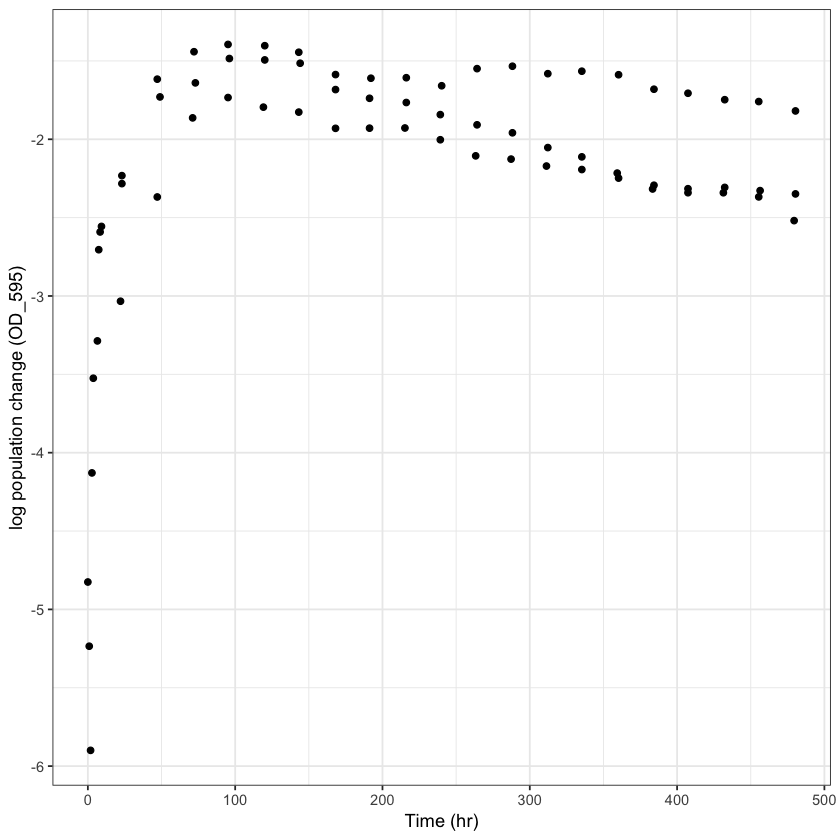

In [45]:
ggplot()+theme_bw()+
xlab("Time (hr)")+ylab(paste0("log population change (",a.1[1,8],")"))+
geom_point(aes(y=log(a.1$Popn_Change), x=a.1$Time.hr))

## variables

In [ ]:
r.m<-(max(a.1$Popn_Change)-min(a.1$Popn_Change))/(max(a.1$Time.hr)-min(a.1$Time.hr))
r.b<-max()

# Logistic functions - R

## Verhulst / classical logistic
\begin{equation}
N_t = \dfrac{N_0Ke^{rt}}{K+N_0(e^{rt}-1)}
\end{equation}
further adaptations: None

In [ ]:
func_log0<-function(N0=mean(a.0[which(a.0$cluster==1),4]),
                    K=mean(a.0[which(a.0$cluster==3),4]),
                    r=r.m, t){
  ## traditional Logistic equation: y~x
  Nt=N0*K*exp(r*t)/(K+N0*(exp(r*t)-1))
  return(Nt)}

## modified Gompertz
\begin{equation}
A = \text{ln}(\dfrac{N_{max}}{N_{min}})
\end{equation}

\begin{equation}
N_t = A \cdot\text{exp}\Big\{-\text{exp}\Big[\dfrac{r_{max}e}{A}(\lambda-t)+1\Big]\Big\}
\end{equation}
further adaptations:  
\begin{equation*}
N_t = \text{exp}\Big(A \cdot\text{exp}\Big\{-\text{exp}\Big[\dfrac{r_{max}e}{A}(\lambda-t)+1\Big]\Big\}\times1.1\Big)
\end{equation*}
1. assume $r_{max}$ = $r$
2. assume $N_{min}$ = $N_0$
3. assume $N_{max}$ = $K$

In [ ]:
func_gom<-function(N0=mean(a.0[which(a.0$cluster==1),4]),
                   K=mean(a.0[which(a.0$cluster==3),4]),
                   r=r.m, t,
                   ld=r.x){
  ## modified Gompertz model, initial 
  A=log(K/N0)
  Nt=A*exp(-exp(r*exp(1)/A*(ld-t)+1))
  return(Nt)}

## Baranyi
\begin{equation}
h_0 = (\text{exp}\{\lambda\times r_{max}\}-1)^{-1}
\end{equation}

\begin{equation}
A_t = t+\dfrac{1}{r_{max}}\cdot\text{ln}\Big(\dfrac{e^{-r_{max}t}+h_0}{1+h_0}\Big)
\end{equation}

\begin{equation}
N_t = N_{min}+r_{max}A_t - \text{ln}\Big(1+\dfrac{e^{r_{max}A_t}-1}{e^{N_{max}-N_{min}}}\Big)
\end{equation}
further adaptations:
\begin{equation*}
N_t = N_{min}+e^{r_{max}A_t} - \text{ln}\Big(1+\dfrac{e^{r_{max}A_t}-1}{e^{N_{max}-N_{min}}}\Big)
\end{equation*}
1. assume $r_{max}$ = $r$
2. assume $N_{min}$ = $N_0$
3. assume $N_{max}$ = $K$

In [ ]:
func_bar<-function(N0=mean(a.0[which(a.0$cluster==1),4]),
                   K=mean(a.0[which(a.0$cluster==3),4]),
                   r=r.m, t,
                   tlag=max(a.0[which(a.0$cluster==1),3])){
  ## Baranyi model
  h0=1/(exp(tlag*r)-1)
  At=t+1/r*log((exp(-r*t)+h0)/(1+h0))
  Nt=sqrt(N0+r*At-log(1+(exp(r*At)-1)/exp(K-N0)))*(At*t^(1/111))
  return(Nt)}

## Buchanan
\begin{equation}
t \leq t_{lag}: N_t = N_{min}
\end{equation}

\begin{equation}
t_{lag} \lt t \lt t_{max}: N_t = N_{max} + r_{max}\cdot(t-t_{lag})
\end{equation}

\begin{equation}
t \geq t_{max}: N_t = N_{max}
\end{equation}

if "lag", "log" and "stationary" periods = cluster $[cst]$ 1, 2, 3 respectively,  
further adaptations:
1. equation fusion from three into one
2. assume $r_{max}$ = $r$
3. assume $N_{min}$ = $N_0$
4. assume $N_{max}$ = $K$

make only log phase valid for log-phase term:
\begin{equation*}
a.010 = ([cst]-1)mod\;2
\end{equation*}

make only stationary phase valid to base number on K:
\begin{equation*}
a.001 = \text{round-up}([cst]mod\;2.5\;mod\;1)
\end{equation*}
%% LatTex spacing in Math mode <http://www.emerson.emory.edu/services/latex/latex_119.html>

Final conditional equation:
\begin{equation*}
N_t = N_{min}+a.001\times(N_{max}-N_{min})+a.010\times\text{exp}(r\times(t-t_{lag}))
\end{equation*}

In [ ]:
func_buc<-function(N0=mean(a.0[which(a.0$cluster==1),4]),
                   K=mean(a.0[which(a.0$cluster==3),4]),
                   r=exp(r.m), t,
                   tlag=max(a.0[which(a.0$cluster==1),3]),
                   cst=as.numeric(a.0$cluster)){
  ## Buchanan model / three-phase logistic model
  a.010=(cst-1)%%2 ## make only log phase valid in growth rate
  a.001=ceiling(cst%%2.5%%1) ## make only final phase valid
  Nt=N0+a.001*(K-N0)+a.010*r*(t-tlag)
  return(Nt)}

## trial plots (associating block floating)

# NLLS - R

## library

In [ ]:
library(minpack.lm)

## Verhulst / classical logistic

## modified Gompertz

## Baranyi

## Buchanan

# NLLS - py3

# Data plotting - R

## library

## colouring

In [ ]:
cbbPalette <- c("#000000", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7", "#e79f00", "#9ad0f3", "#F0E442", "#999999", "#cccccc", "#6633ff", "#00FFCC", "#0066cc")

## calculation from functions

## melting calculation result for ggplot2

## ggplot2 plotting